In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("proj_3_scotus.csv")

In [3]:
pd.options.display.max_columns = 60

In [4]:
df.sort_values(by=['dateDecision'],inplace=True)

<AxesSubplot:xlabel='term', ylabel='1.0'>

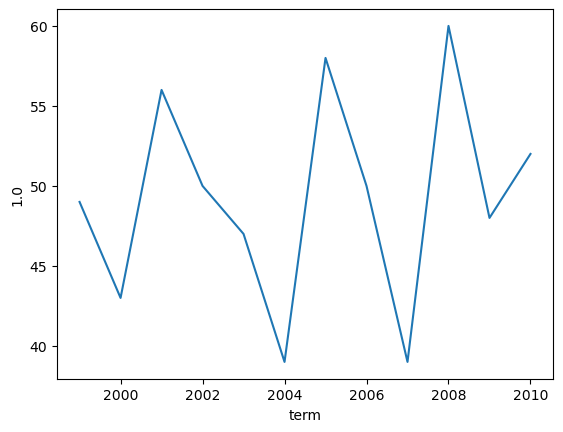

In [11]:
term = df.loc[df.term.between(1999,2010)]
term = term.groupby(["term","decisionDirection"])["caseId"].count().unstack()
#term = pd.DataFrame(term)
term.head()
sns.lineplot(data=term, x=term.index,y=1.0)


In [12]:
term

decisionDirection,1.0,2.0,3.0
term,,,
1999,49.0,43.0,NaN
2000,43.0,49.0,2.0
2001,56.0,39.0,1.0
2002,50.0,40.0,2.0
2003,47.0,47.0,1.0
2004,39.0,51.0,1.0
2005,58.0,41.0,1.0
2006,50.0,34.0,NaN
2007,39.0,40.0,1.0


C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\949202509.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size=14)
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\949202509.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),size=14)


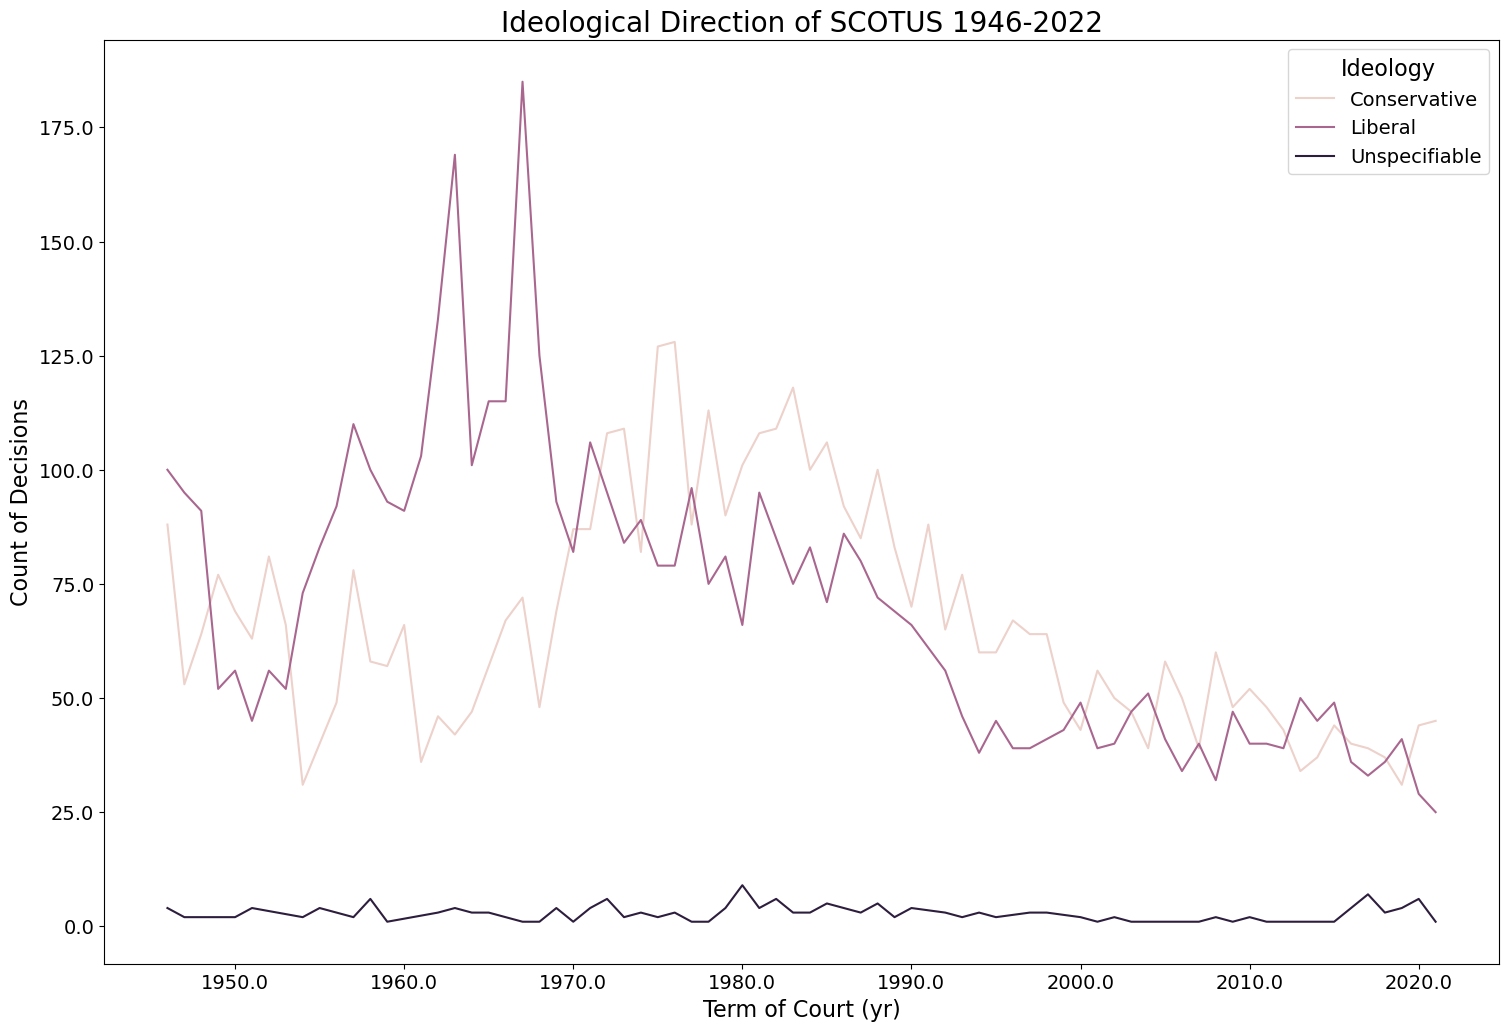

In [13]:
term = df.loc[df.term.between(1946,2022)]
term = term.groupby(["term","decisionDirection"])["caseId"].count()
term = pd.DataFrame(term).reset_index()
term["term"] = term["term"].astype(int)

fig, ax = plt.subplots(1,1, figsize=(18,12))

sns.lineplot(data=term, x="term",y="caseId",hue="decisionDirection")
ax.set_title("Ideological Direction of SCOTUS 1946-2022",fontsize=20)
ax.set_xlabel("Term of Court (yr)",fontsize=16)
ax.set_ylabel("Count of Decisions",fontsize=16)
ax.set_xticklabels(ax.get_xticks(),size=14)
ax.set_yticklabels(ax.get_yticks(),size=14)
lg = plt.legend(labels=["Conservative","Liberal","Unspecifiable"],title="Ideology",fontsize=14,title_fontsize=16)

In [14]:
review_counts = term.groupby("term")["caseId"].sum()

In [15]:
pd.options.display.max_rows = 200


In [16]:
colors = ["#3399ff","#00cc99","#ff9999","#ffad33","#9966ff"]
sns.set_palette(sns.color_palette(colors))

C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\193115756.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size=14)
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\193115756.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),size=14)
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\193115756.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(int))
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\193115756.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks().astype(int))


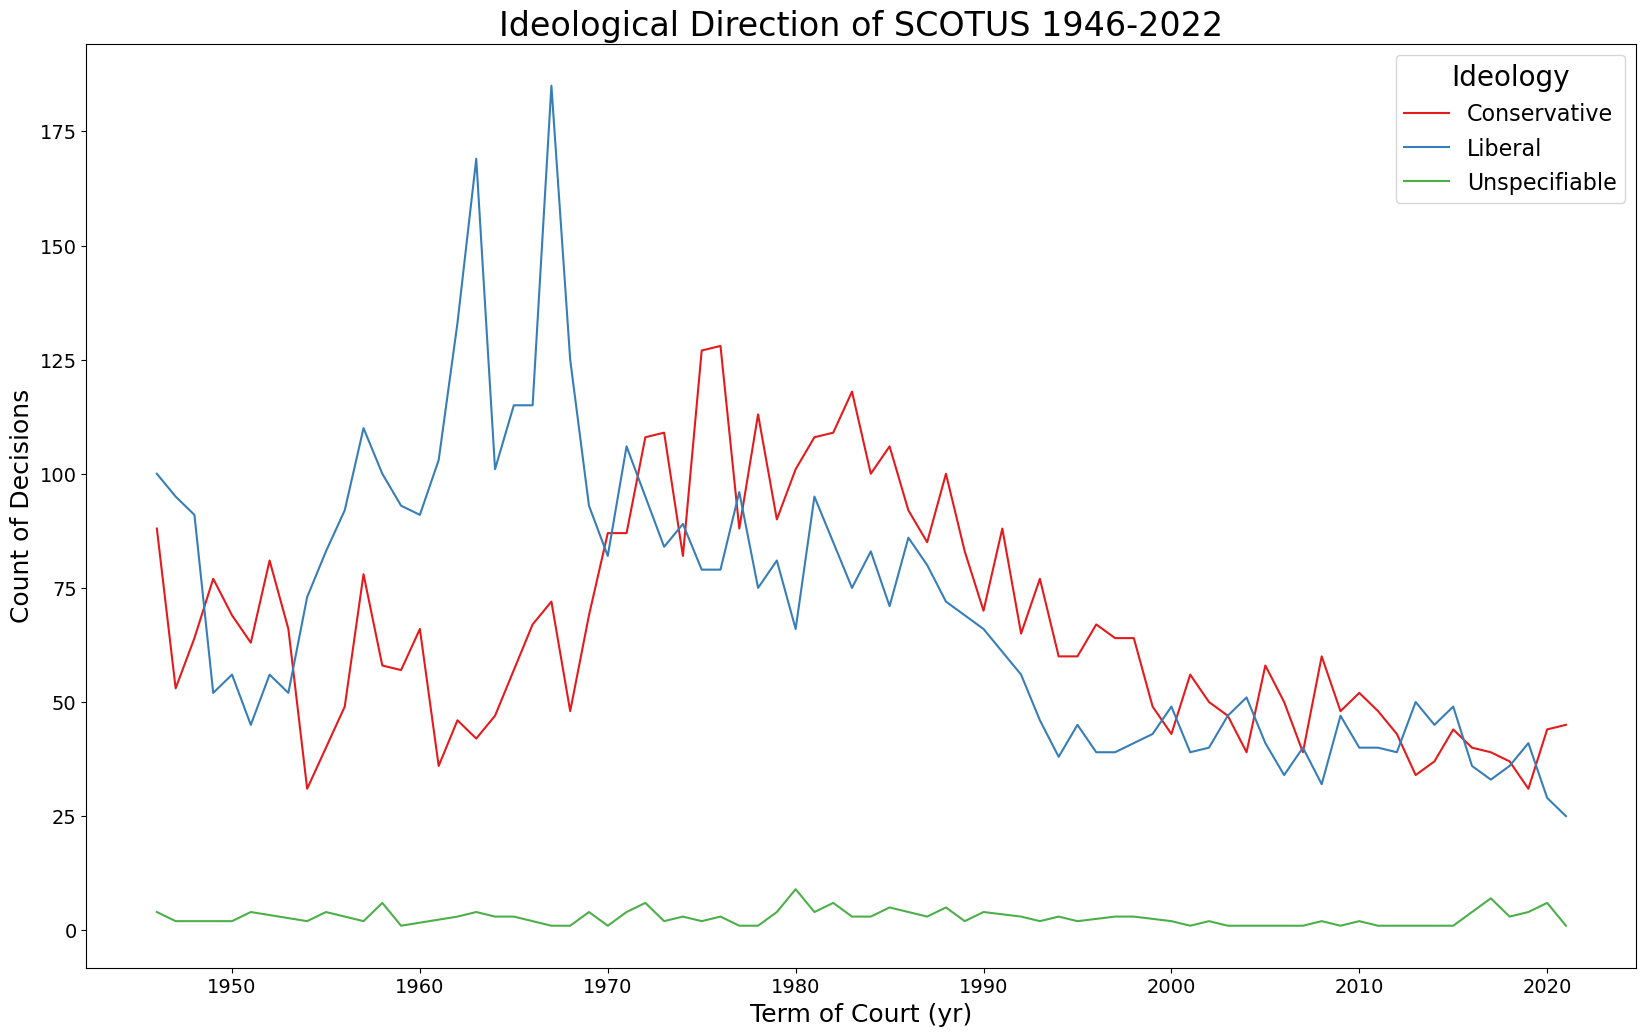

In [58]:
term = df.loc[df.term.between(1946,2022)]
term = term.groupby(["term","decisionDirection"])["caseId"].count()
term = pd.DataFrame(term).reset_index()
term["term"] = term["term"].astype(int)

fig, ax = plt.subplots(1,1, figsize=(20,12))

sns.lineplot(data=term, x="term",y="caseId",hue="decisionDirection",palette="Set1")
ax.set_title("Ideological Direction of SCOTUS 1946-2022",fontsize=24)
ax.set_xlabel("Term of Court (yr)",fontsize=18)
ax.set_ylabel("Count of Decisions",fontsize=18)
ax.set_xticklabels(ax.get_xticks(),size=14)
ax.set_yticklabels(ax.get_yticks(),size=14)
ax.set_xticklabels(ax.get_xticks().astype(int))
ax.set_yticklabels(ax.get_yticks().astype(int))
lg = plt.legend(labels=["Conservative","Liberal","Unspecifiable"],title="Ideology",fontsize=16,title_fontsize=20)
#lg.set_title('Ideology',prop={'size':'large'})
plt.savefig('Ideological_Lineplot.png',bbox_inches='tight')
plt.show()


In [18]:
df['vote'] = df['majVotes'].astype(str) +"-"+ df['minVotes'].astype(str)

In [19]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,merge_date,president,party,vote
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,1946-11-18,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1,1946-11-18,Harry S. Truman,Democratic,8-1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3,1946-11-18,Harry S. Truman,Democratic,6-3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3,1946-11-18,Harry S. Truman,Democratic,6-3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3,1946-11-18,Harry S. Truman,Democratic,6-3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3,1946-11-18,Harry S. Truman,Democratic,6-3


In [20]:
df.vote.value_counts()

9-0    2956
5-4    1611
6-3    1485
7-2    1127
8-1     931
8-0     857
6-2     378
5-3     357
7-1     332
7-0     165
4-4     129
5-2     105
6-1      82
4-3      75
4-2      22
6-0      20
5-1       7
3-3       3
5-0       3
Name: vote, dtype: int64

In [21]:
def vote_cat(x):
    if x in ["9-0","8-1","8-0","7-1","7-0","6-1","6-0","5-1","5-0","7-2","6-2"]:
        return "Unanimous court or near"
    else: 
        return "Divided court"

In [22]:
df["vote_cat"] = df.vote.apply(vote_cat)

In [25]:
votecat = df.groupby(["term","vote_cat"])["caseId"].count()

In [26]:
votecat = pd.DataFrame(votecat).reset_index()

In [22]:
votecat

,term,vote_cat,caseId
0,1946,Divided court,73
1,1946,Unanimous court or near,120
2,1947,Divided court,54
3,1947,Unanimous court or near,97
4,1948,Divided court,73
5,1948,Unanimous court or near,89
6,1949,Divided court,30
7,1949,Unanimous court or near,100
8,1950,Divided court,50
9,1950,Unanimous court or near,81


C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\34355908.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size=14)
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\34355908.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),size=14)
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\34355908.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(int))
C:\Users\liisa\AppData\Local\Temp\ipykernel_15176\34355908.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks().astype(int))


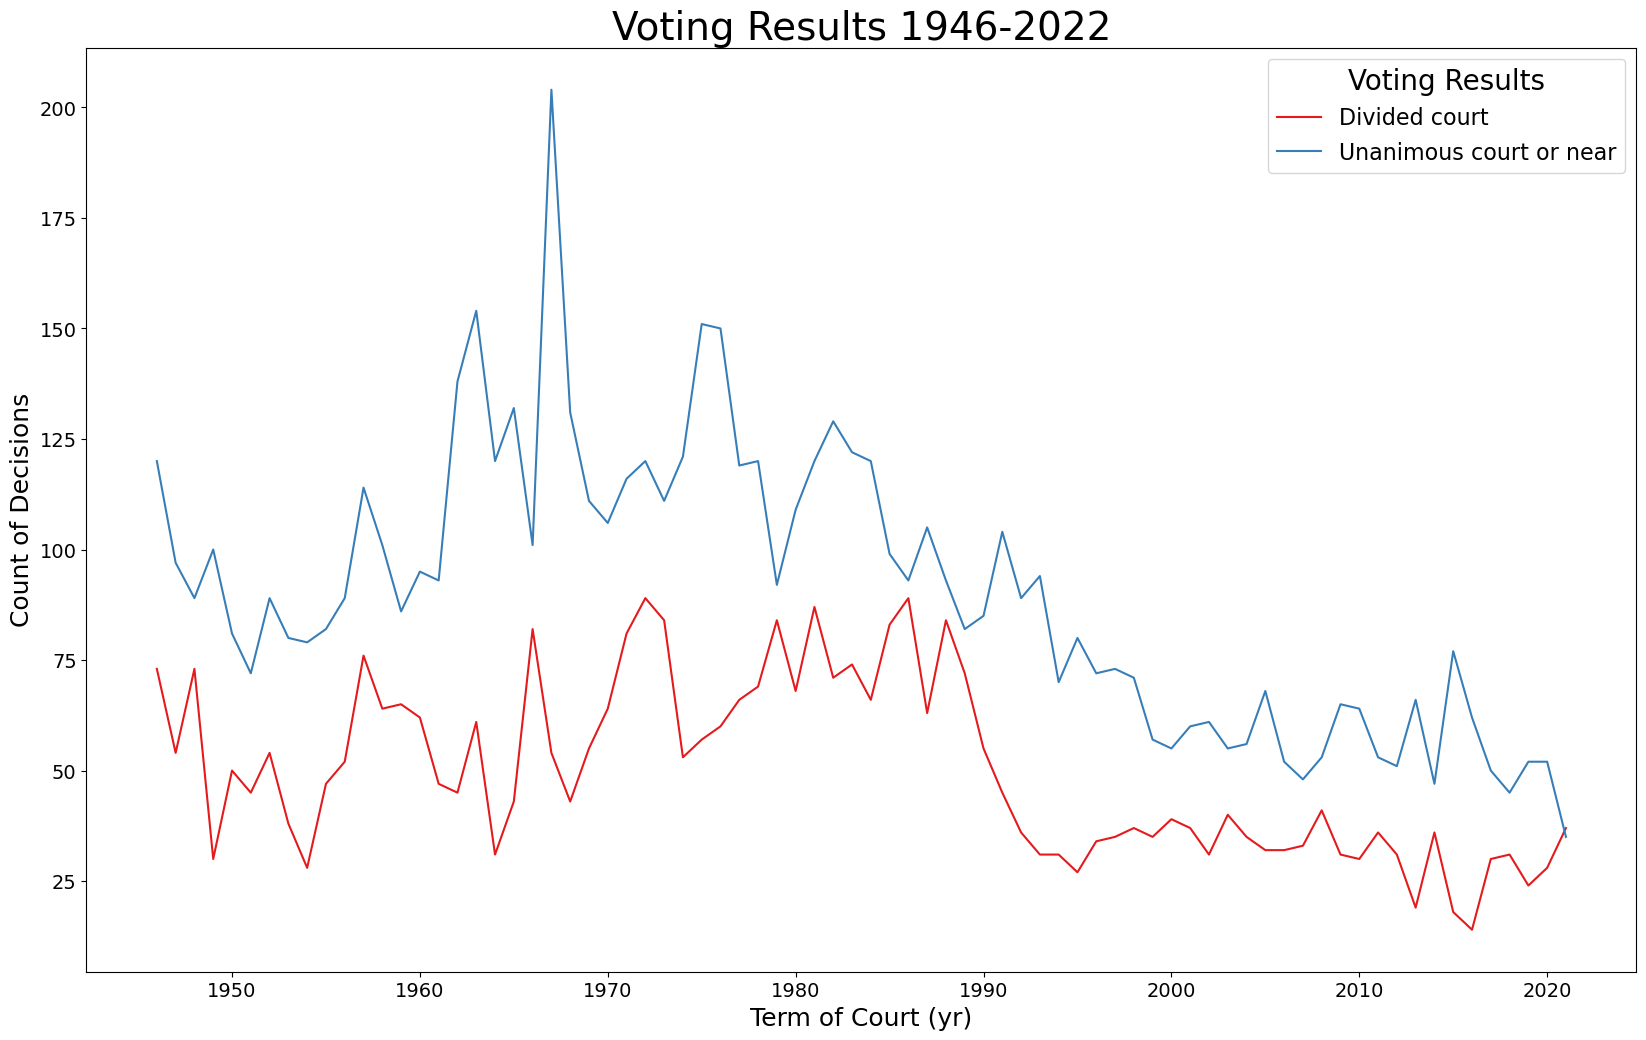

In [27]:
fig, ax = plt.subplots(1,1, figsize=(20,12))

sns.lineplot(data=votecat, x="term",y="caseId",hue="vote_cat",palette="Set1")
ax.set_title("Voting Results 1946-2022",fontsize=28)
ax.set_xlabel("Term of Court (yr)",fontsize=18)
ax.set_ylabel("Count of Decisions",fontsize=18)
ax.set_xticklabels(ax.get_xticks(),size=14)
ax.set_yticklabels(ax.get_yticks(),size=14)
ax.set_xticklabels(ax.get_xticks().astype(int))
ax.set_yticklabels(ax.get_yticks().astype(int))
lg = plt.legend(title="Voting Results",fontsize=16,title_fontsize=20)
#lg.set_title('Ideology',prop={'size':'large'})
plt.savefig('VotingOutcomes_Lineplot.png',bbox_inches='tight')   
plt.show()


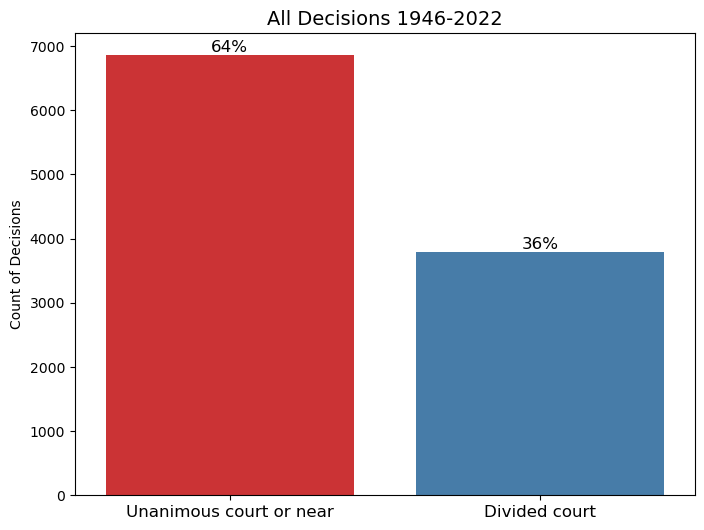

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
abs_values = df['vote_cat'].value_counts(normalize=True).values * 100

sns.countplot(data=df, x="vote_cat", palette="Set1")
ax.bar_label(container=ax.containers[0], labels=pd.Series(abs_values).map('{:.0f}%'.format),fontsize=12)
ax.set_title("All Decisions 1946-2022",fontsize=14)
ax.set(xlabel=None)
ax.set(ylabel="Count of Decisions")
ax.tick_params(axis='x', labelsize=12)
fig.savefig("voteresults.png",bbox_inches='tight')

plt.show()



In [29]:
df['decade'] = (df['term'] // 10) * 10

In [30]:
df.decade.value_counts().sort_values()

2020     152
1940     636
2010     836
2000     924
1990    1161
1950    1392
1960    1802
1980    1829
1970    1913
Name: decade, dtype: int64

In [31]:
party_counts = df.groupby(["party","decisionDirection"])["caseId"].count()

In [32]:
partycounts = pd.DataFrame(party_counts).reset_index()

In [33]:
partycounts

,party,decisionDirection,caseId
0,Democratic,1.0,2241
1,Democratic,2.0,2531
2,Democratic,3.0,71
3,Republican,1.0,2852
4,Republican,2.0,2802
5,Republican,3.0,107


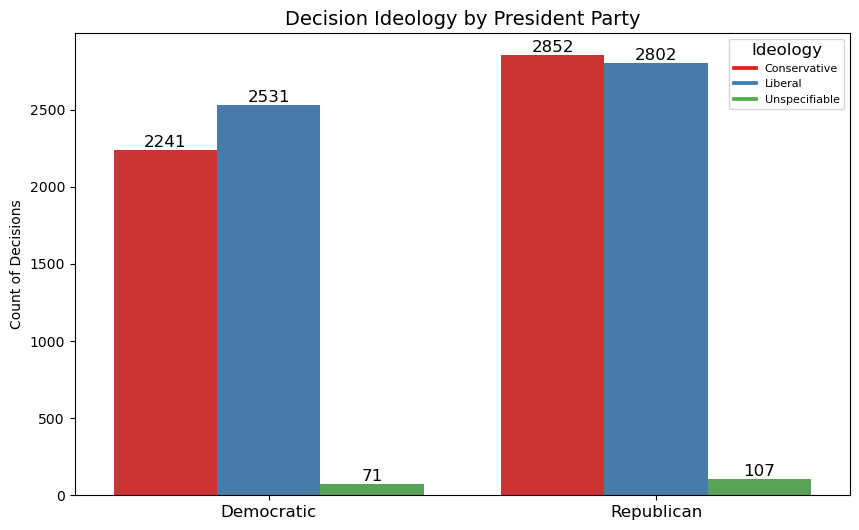

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(data=partycounts,x="party",y="caseId",hue="decisionDirection",palette="Set1")
ax.set_title("Decision Ideology by President Party",fontsize=14)
ax.set(xlabel=None)
ax.set(ylabel="Count of Decisions")
ax.tick_params(axis='x', labelsize=12)
lg = plt.legend(labels=["Conservative","Liberal","Unspecifiable"],title="Ideology",fontsize=8,title_fontsize=12)
leg = ax.get_legend()
leg.legendHandles[0].set_color('#e41a1c')
leg.legendHandles[1].set_color('#377eb8')
leg.legendHandles[2].set_color('#4daf4a')
for i in ax.containers:
    ax.bar_label(i,fontsize=12)
    
fig.savefig("pres.png",bbox_inches='tight')
plt.show()




In [40]:
pal = sns.color_palette("Set1")
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [122]:
pal.as_hex()[:]

['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

In [44]:
votes = {'Decision': ["Dobbs v. Jackson \nWomen's Health Org", "New York State Rifle\n & Pistol Assoc. v. Bruen",'West Virginia v. Environmental\n Protection Agency', 'Kennedy v. Bremerton\n School District'],
        'Majority votes': [6,6,6,6], 'Minority votes': [3,3,3,3]}

In [45]:
dfvotes = pd.DataFrame(votes)

In [46]:
dfvotes.set_index('Decision', inplace=True)

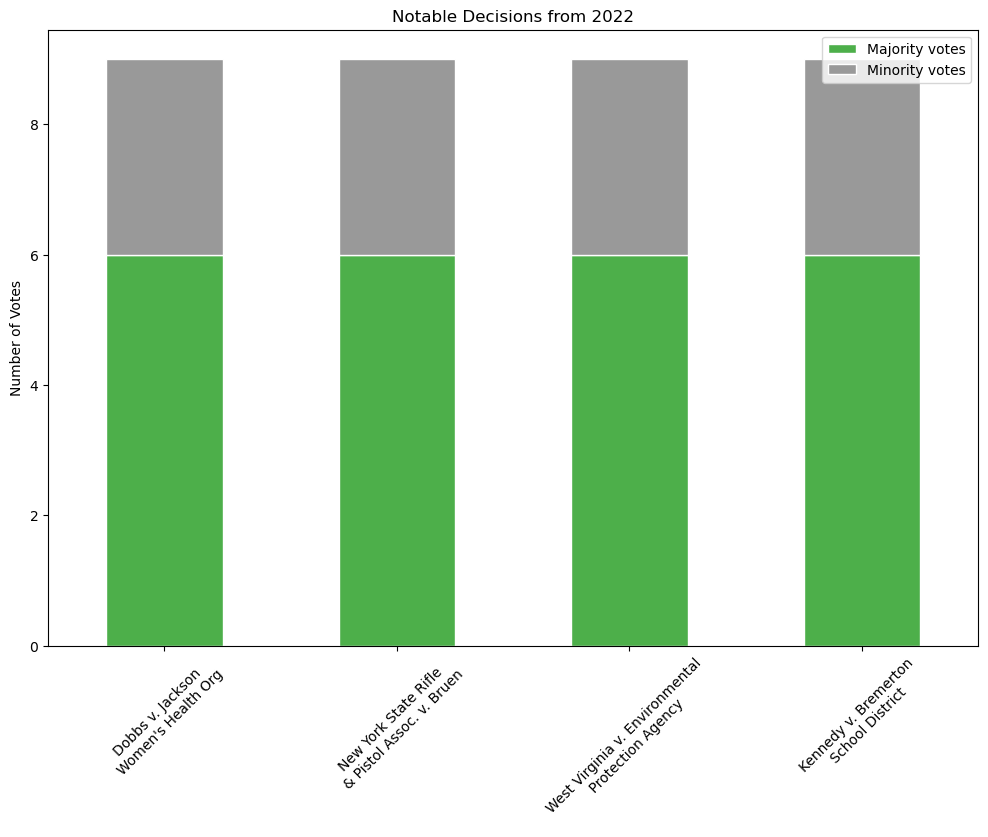

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
dfvotes.plot(kind='bar', stacked=True, color=['#4daf4a', '#999999'], edgecolor='white', ax=ax)

# set the chart title and axes labels
plt.title('Notable Decisions from 2022')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
ax.set(xlabel=None)
fig.savefig("new_2022",bbox_inches='tight')
plt.show()

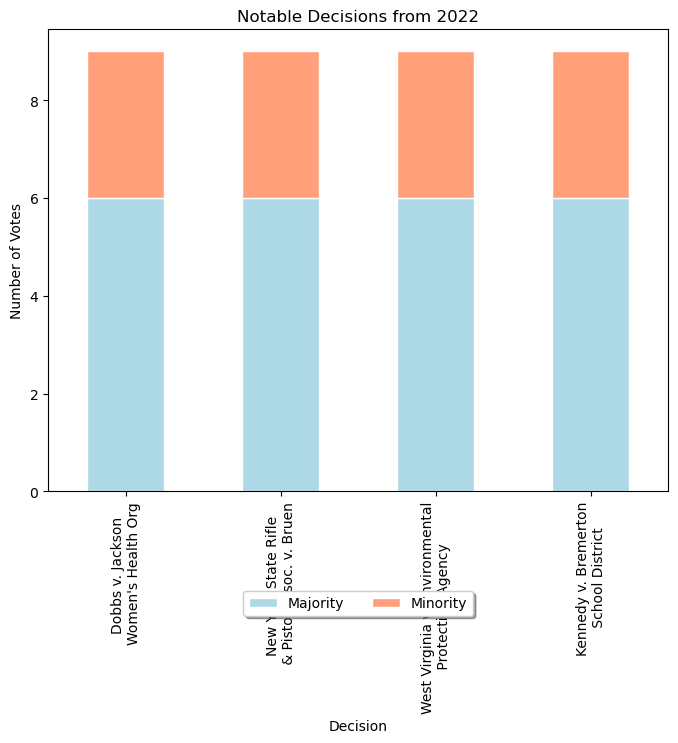

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
dfvotes.plot(kind='bar', stacked=True, color=['#ADD8E6', '#FFA07A'], edgecolor='white', ax=ax)

# set the chart title and axes labels
plt.title('Notable Decisions from 2022')
plt.ylabel('Number of Votes')

# add a legend to the chart
lg = ax.legend(labels=['Majority', 'Minority'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, fancybox=True, shadow=True)


plt.show()

In [48]:
dfvotes.groupby("Majority or Minority")["VoteIdeology"].count()

Majority or Minority
Majority    6
Minority    3
Name: VoteIdeology, dtype: int64

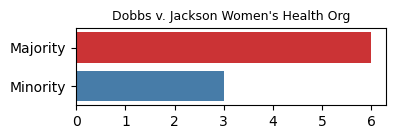

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("Dobbs v. Jackson Women's Health Org",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
fig.savefig("dobbs.png",bbox_inches='tight')
plt.show()




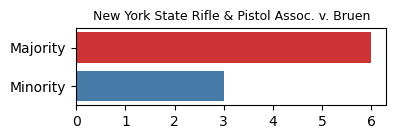

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("New York State Rifle & Pistol Assoc. v. Bruen",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
fig.savefig("bruen.png",bbox_inches='tight')
plt.show()


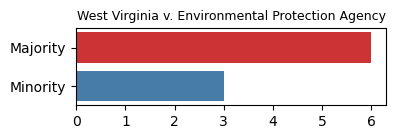

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("West Virginia v. Environmental Protection Agency",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
fig.savefig("epa.png",bbox_inches='tight')
plt.show()


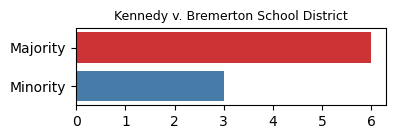

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("Kennedy v. Bremerton School District",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()


In [180]:
from matplotlib import rcParams

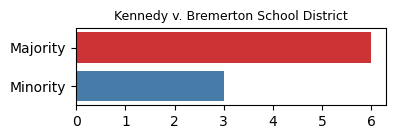

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("Kennedy v. Bremerton School District",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()


In [197]:
!pip install plotly

In [198]:
pd.options.plotting.backend = "plotly"

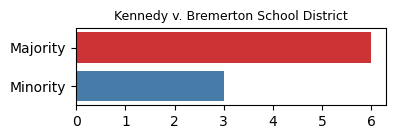

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

sns.countplot(data= dfvotes, y = "Majority or Minority", palette = "Set1",orient="h")
ax.set_title("Kennedy v. Bremerton School District",fontsize=9)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

C:\Users\liisa\AppData\Local\Temp\ipykernel_8164\620523541.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\liisa\AppData\Local\Temp\ipykernel_8164\620523541.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\liisa\AppData\Local\Temp\ipykernel_8164\620523541.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\liisa\AppData\Local\Temp\ipykernel_8164\620523541.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



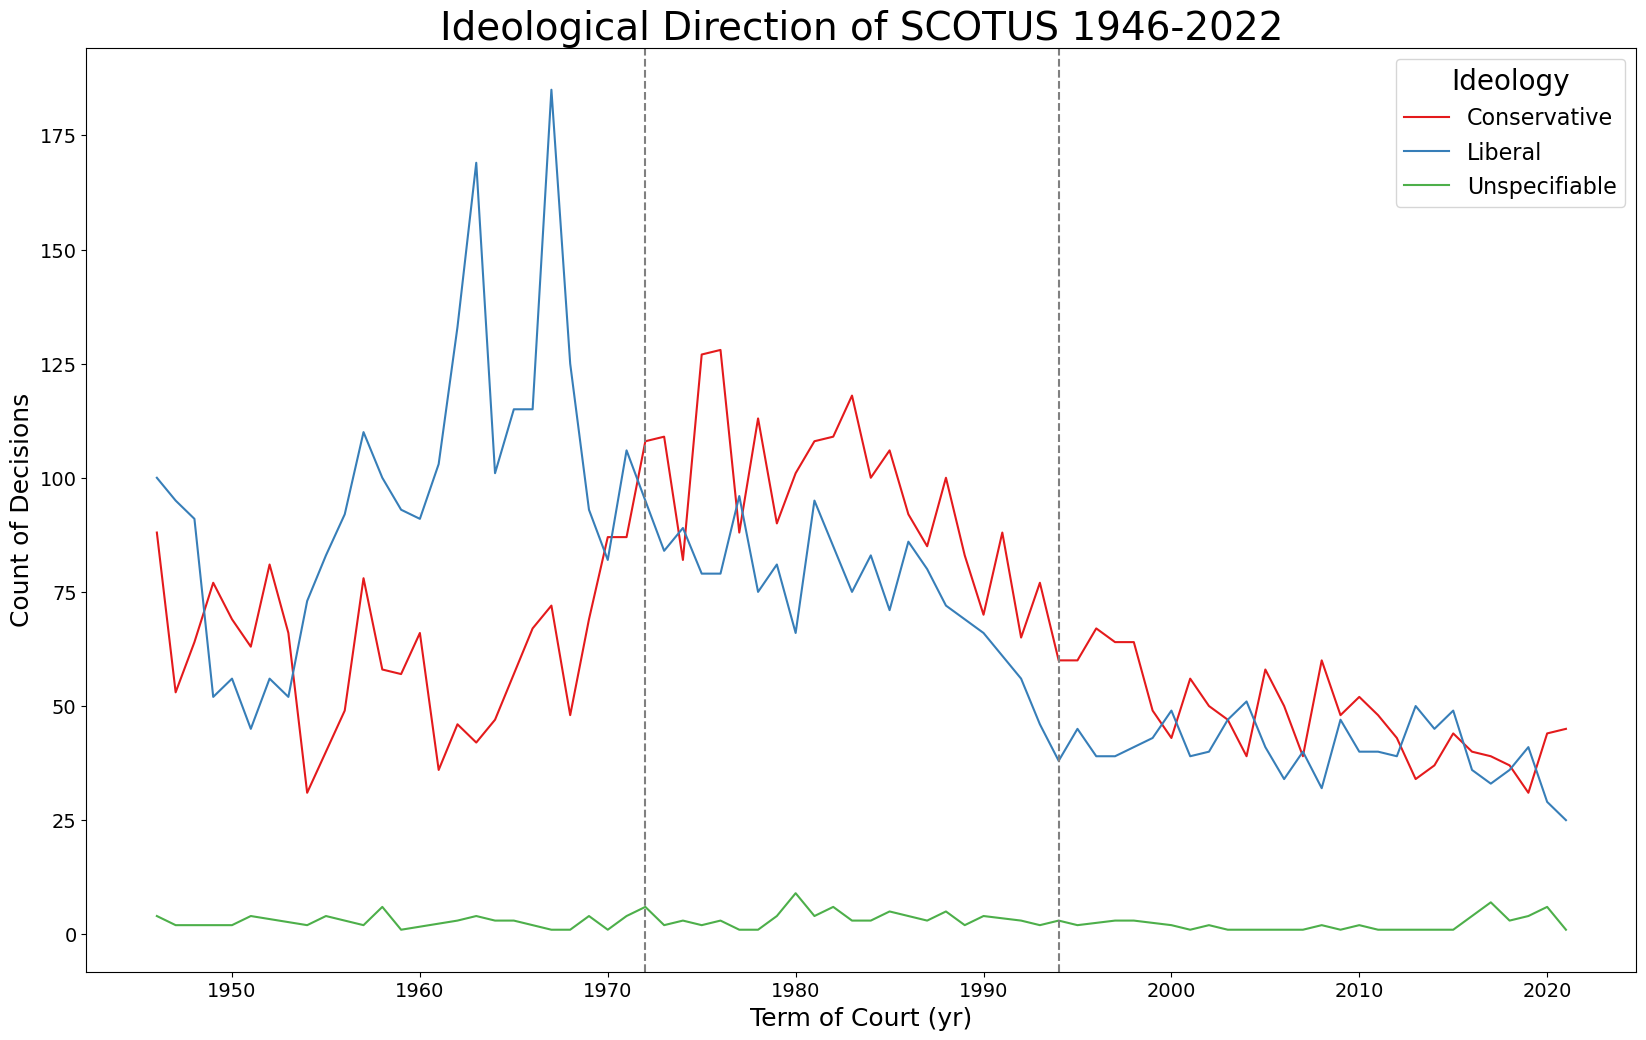

In [225]:
term = df.loc[df.term.between(1946,2022)]
term = term.groupby(["term","decisionDirection"])["caseId"].count()
term = pd.DataFrame(term).reset_index()
term["term"] = term["term"].astype(int)

fig, ax = plt.subplots(1,1, figsize=(20,12))

sns.lineplot(data=term, x="term",y="caseId",hue="decisionDirection",palette="Set1")
ax.set_title("Ideological Direction of SCOTUS 1946-2022",fontsize=28)
ax.set_xlabel("Term of Court (yr)",fontsize=18)
ax.set_ylabel("Count of Decisions",fontsize=18)
ax.set_xticklabels(ax.get_xticks(),size=14)
ax.set_yticklabels(ax.get_yticks(),size=14)
ax.set_xticklabels(ax.get_xticks().astype(int))
ax.set_yticklabels(ax.get_yticks().astype(int))
lg = plt.legend(labels=["Conservative","Liberal","Unspecifiable"],title="Ideology",fontsize=16,title_fontsize=20)
ax.axvline(x=1972, color='gray', linestyle='--')
ax.axvline(x=1994, color='gray', linestyle='--')

plt.savefig('Ideological_Lineplot.png',bbox_inches='tight')
plt.show()
